In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
polygon = gpd.read_file('layers/POLYGON.shp')

<Figure size 1440x1440 with 0 Axes>

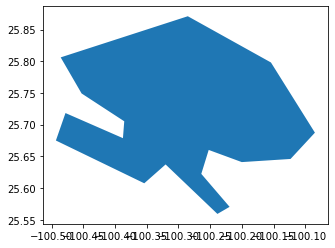

In [3]:
plt.figure(figsize=(20,20))
polygon.plot()

In [ ]:
mexico = gpd.read_file('mexico-latest-free/gis_osm_roads_free_1.shp')

In [5]:
streets = gpd.sjoin(mexico, polygon, op='intersects')

In [7]:
streets.head()

osm_id  code       fclass                                  name  \
28400  26440964  5115     tertiary                      Nueva Inglaterra   
28401  26441384  5114    secondary                Avenida Rodrigo GÃ³mez   
28402  26441571  5115     tertiary  Profr. MoisÃ©s SÃ¡enz (Av. Urdiales)   
28441  26462167  5122  residential                Jardin de las Delicias   
28442  26462260  5122  residential                     Ciudad del LimÃ³n   

        ref oneway  maxspeed  layer bridge tunnel  \
28400  None      B         0      0      F      F   
28401  None      F         0      0      F      F   
28402  None      B         0      0      F      F   
28441  None      B         0      0      F      F   
28442  None      B         0      0      F      F   

                                                geometry  index_right  
28400  LINESTRING (-100.35518 25.71769, -100.35551 25...            0  
28401  LINESTRING (-100.34240 25.74358, -100.34248 25...            0  
28402  LINESTRING (-100.35109 25.69870, -100.35039 25...            0  
28441  LINESTRING (-100.35049 25.71452, -100.35095 25...            0  
28442  LINESTRING (-100.35325 25.71466, -100.35320 25...            0

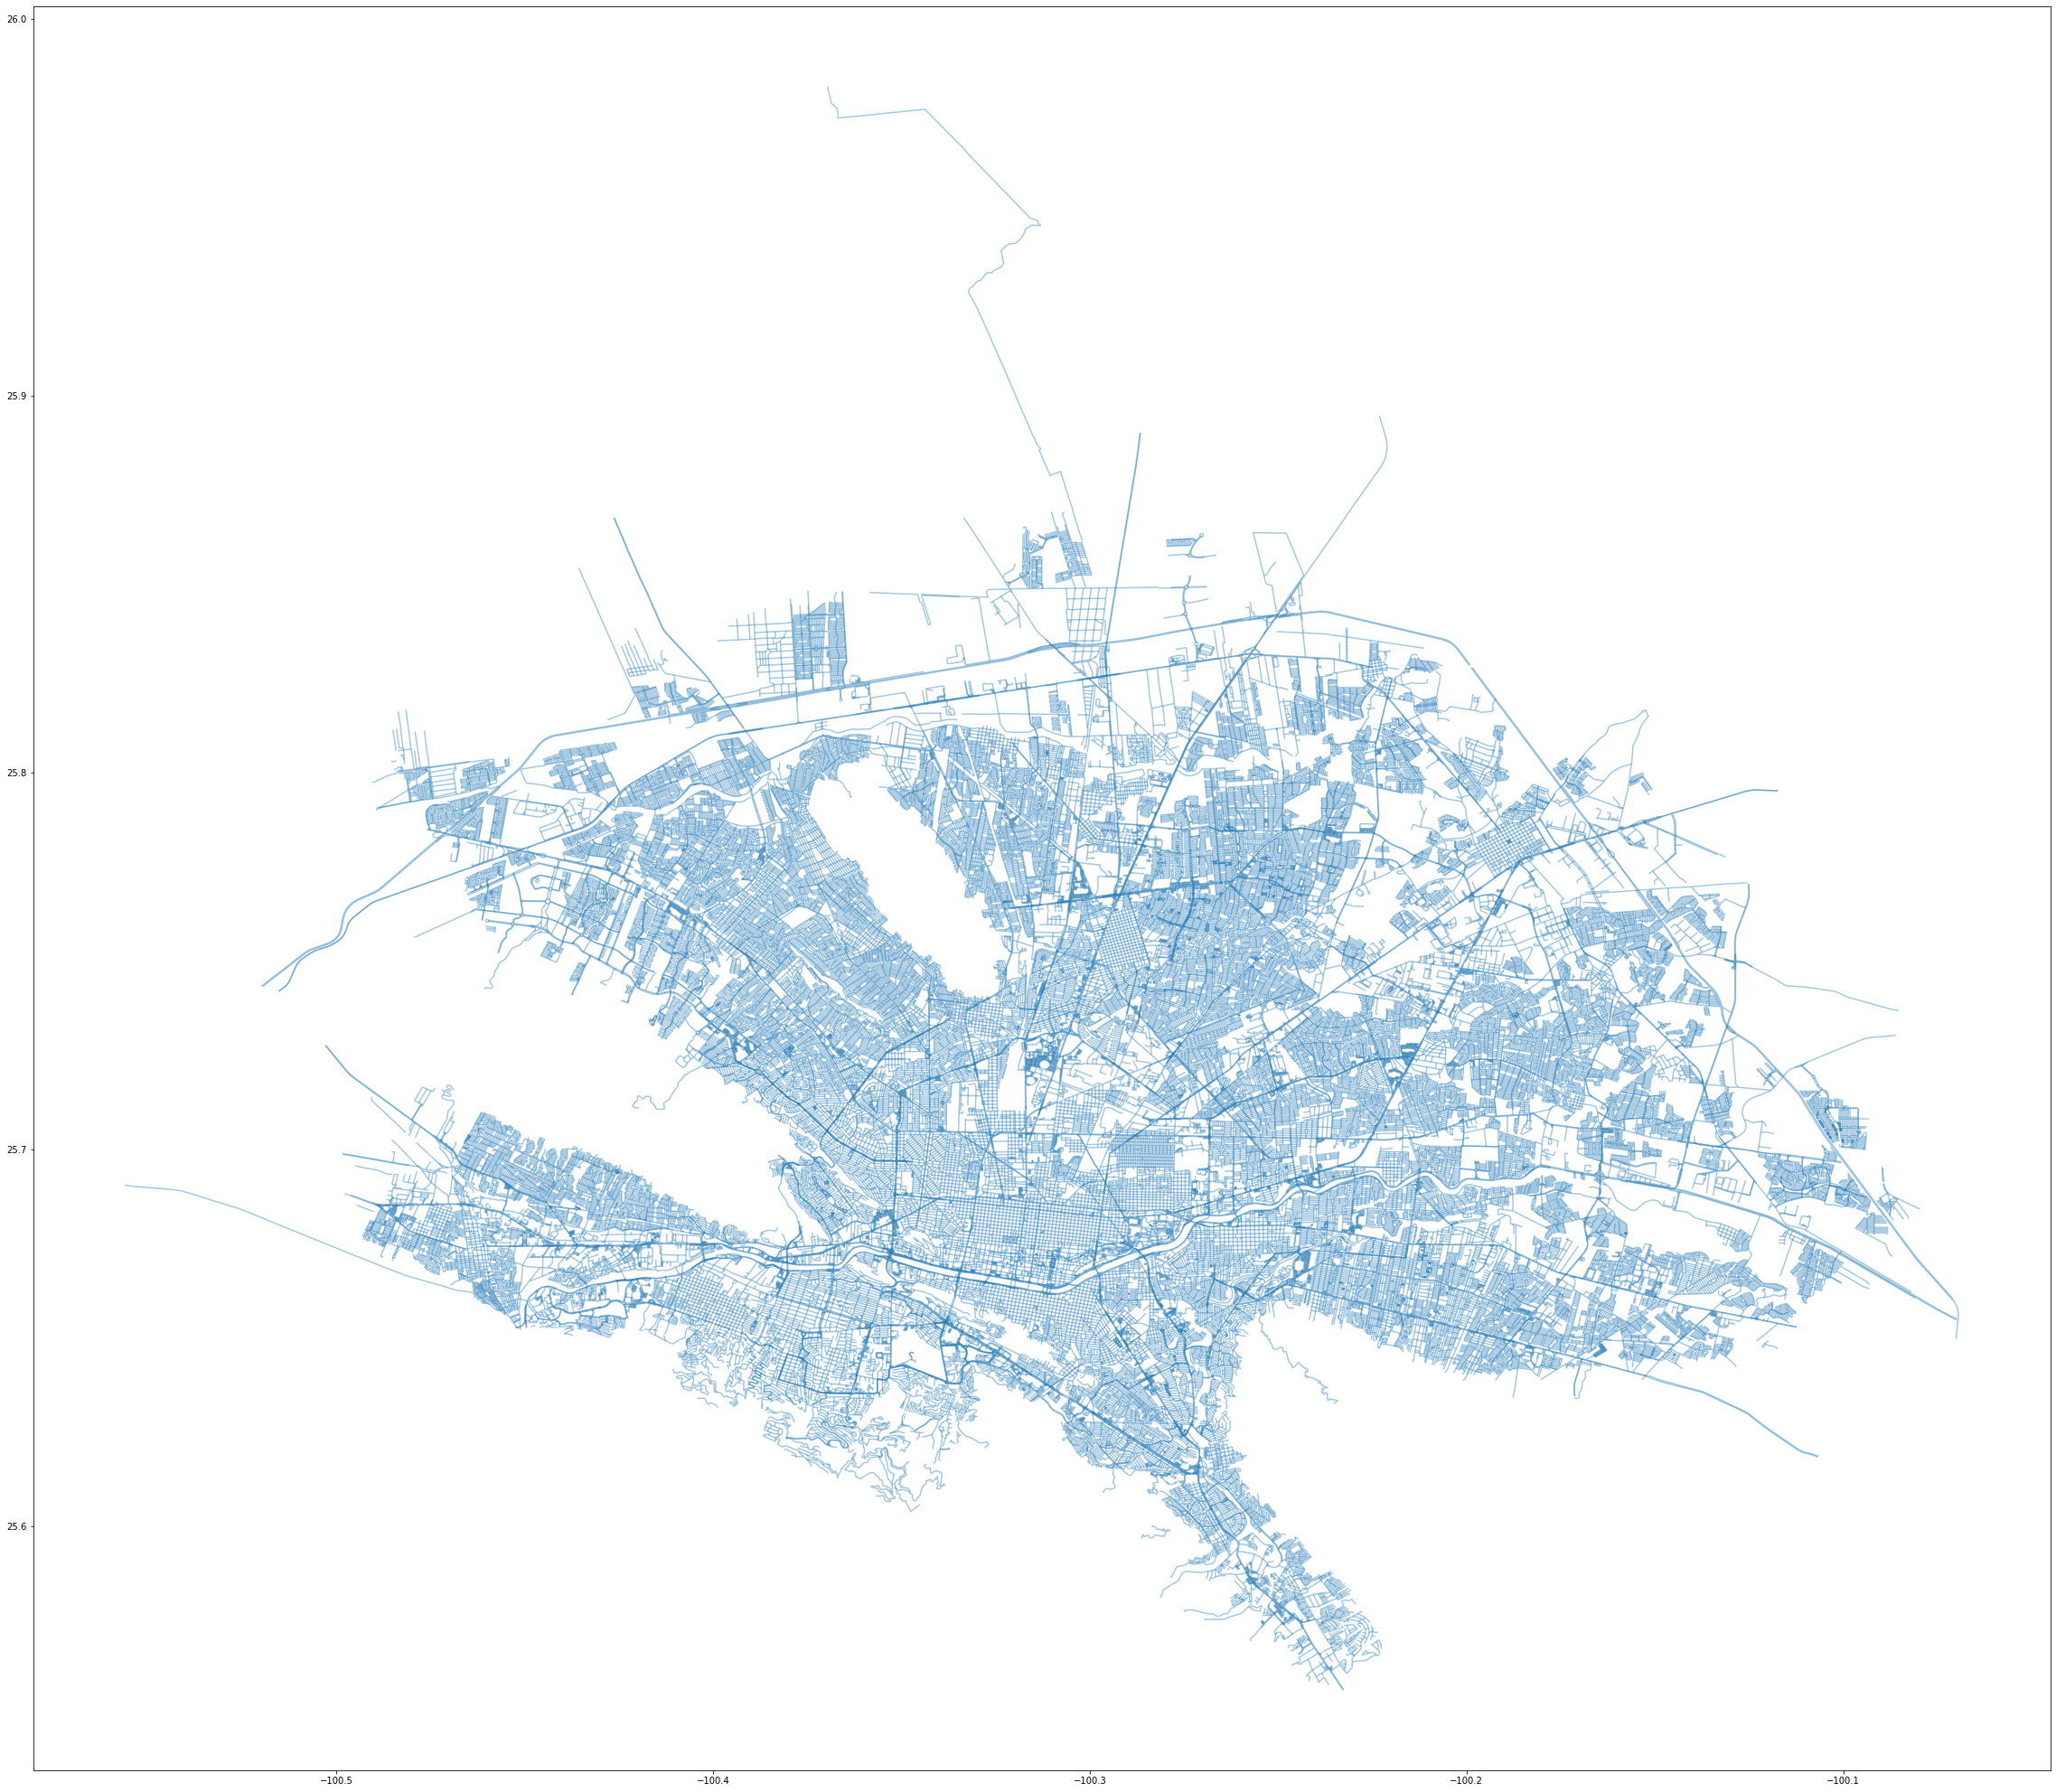

In [8]:
fig,ax = plt.subplots(figsize=(40,40))
streets.plot(ax=ax, alpha=0.4)

In [12]:
main_streets = streets[(streets.fclass == 'primary')|(streets.fclass == 'secondary')|(streets.fclass == 'motorway')|
                      (streets.fclass == 'residential')]

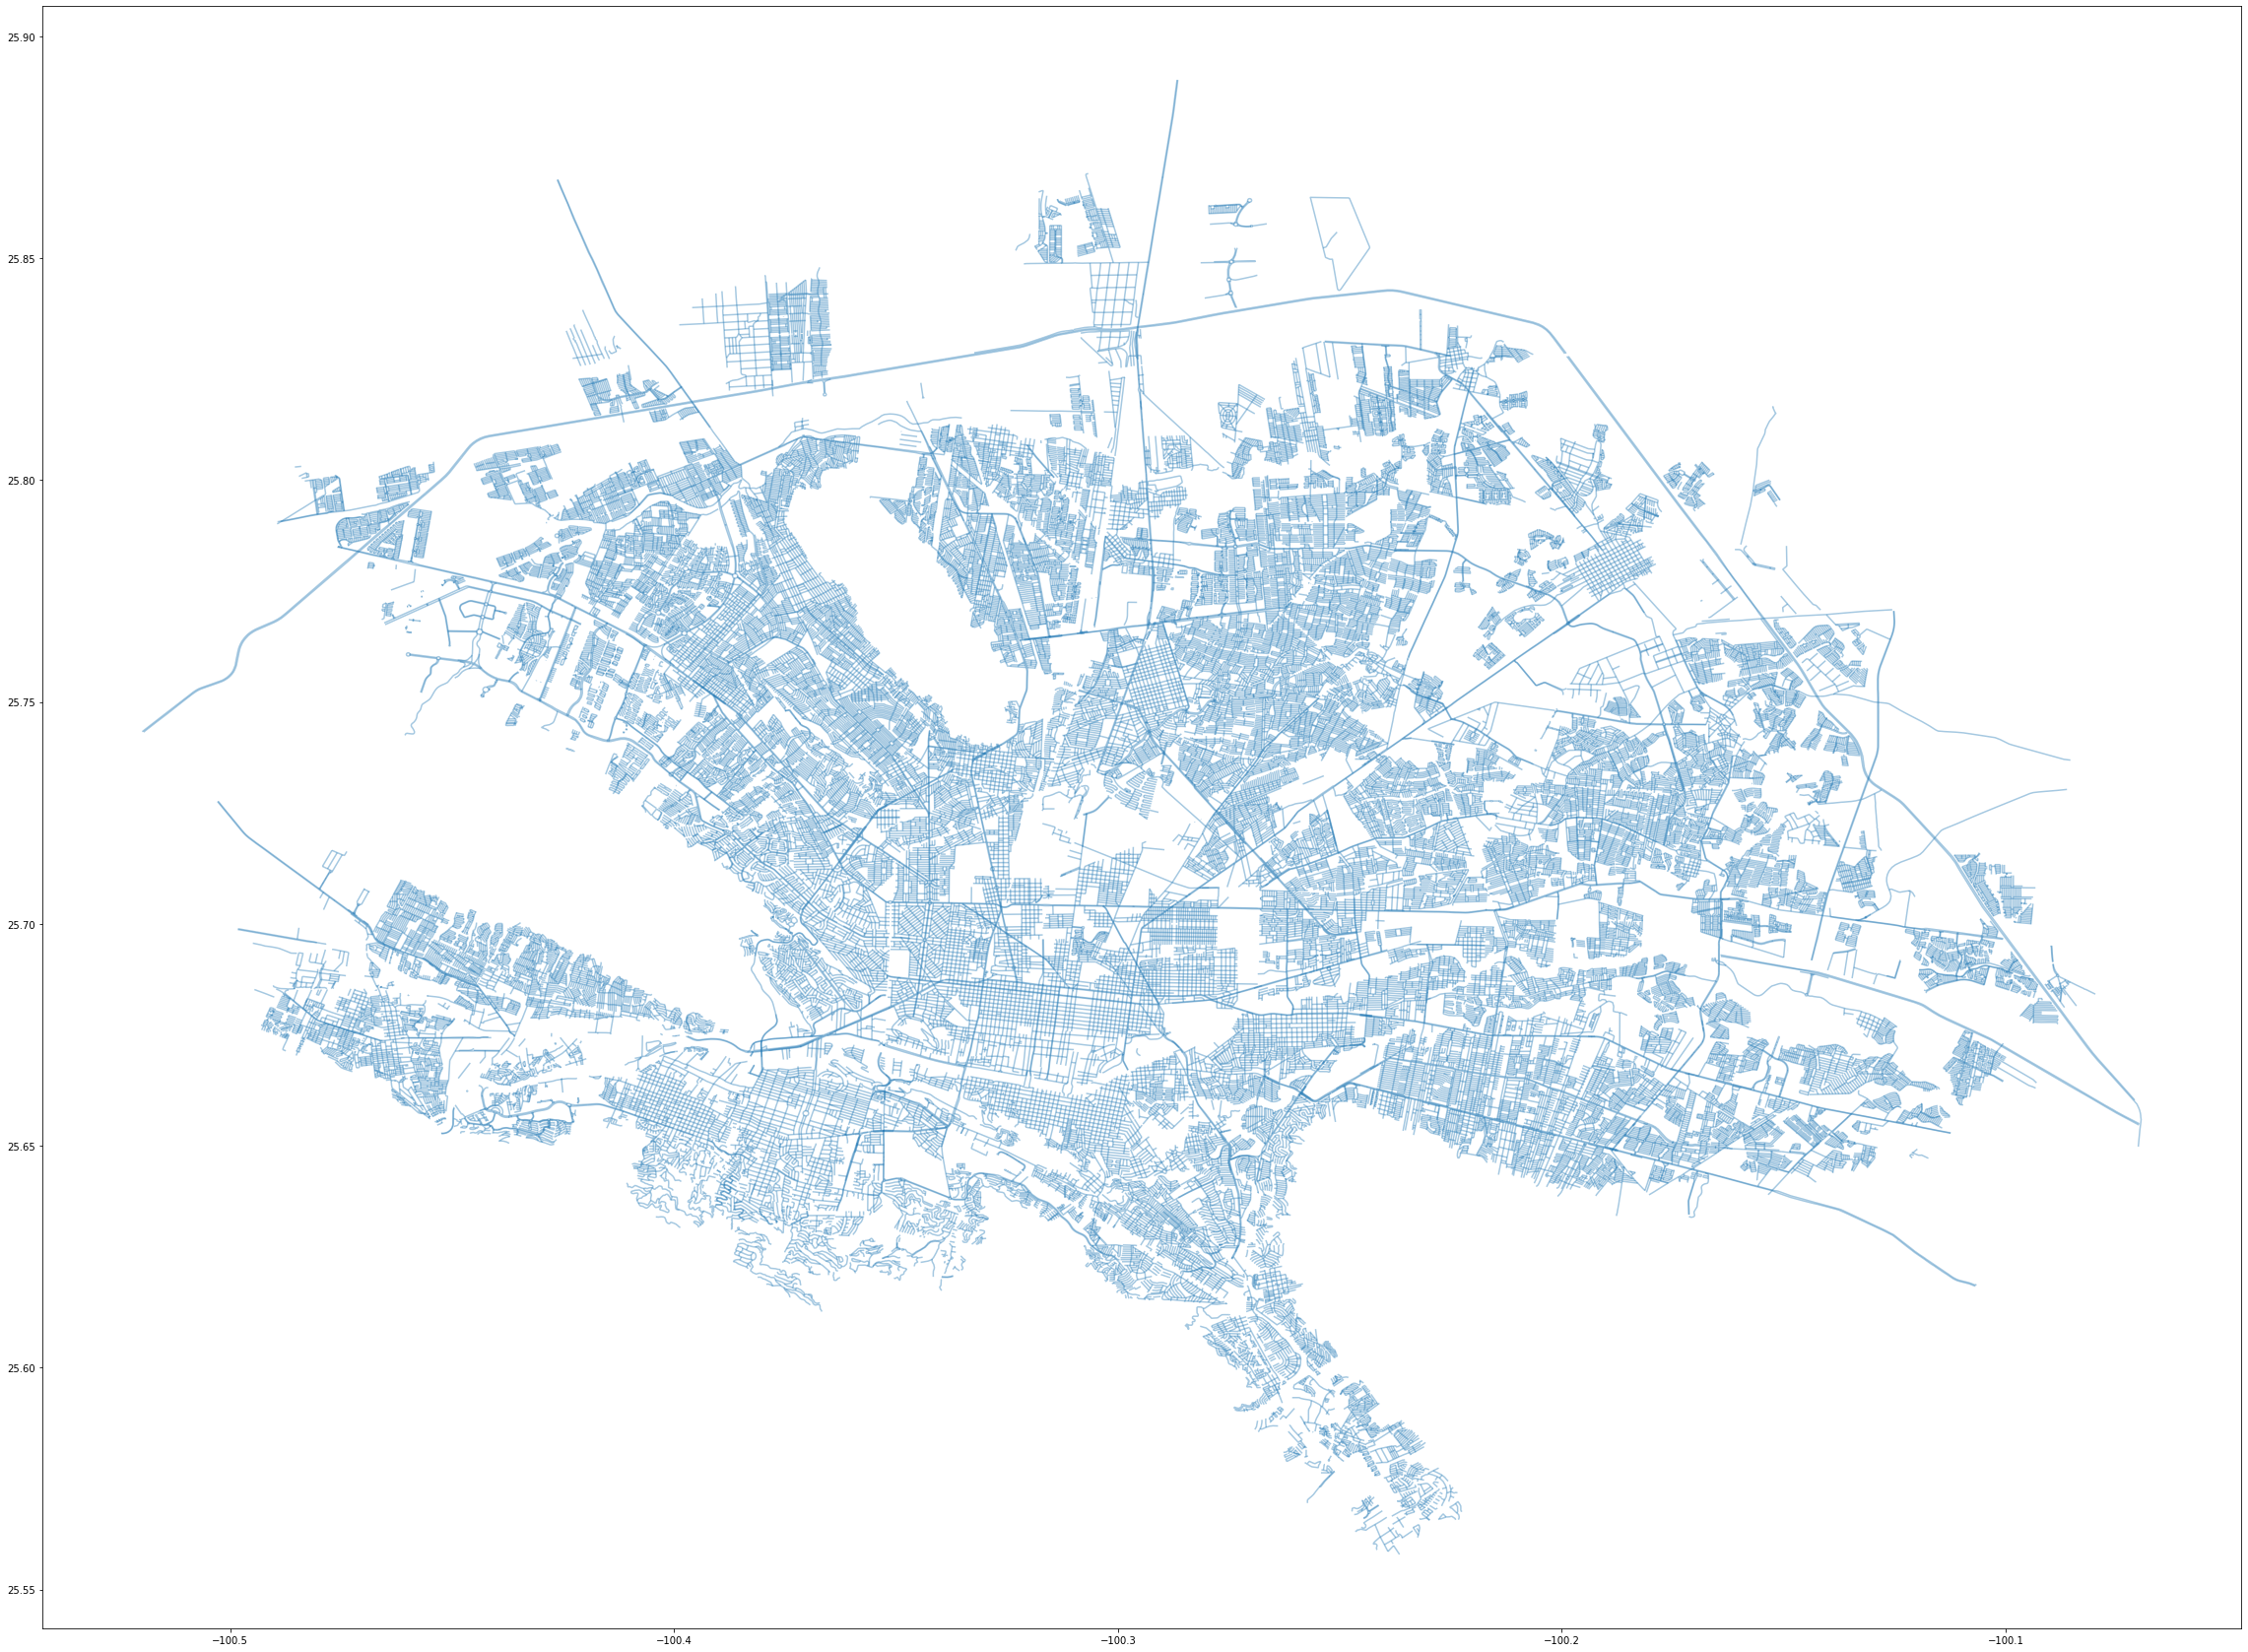

In [13]:
fig,ax = plt.subplots(figsize=(40,40))
main_streets.plot(ax=ax, alpha=0.4)

In [90]:
emergency = pd.read_excel('cordenadas_emergencia.xls')

In [91]:
emergency.head()

Folio         Día   Hora  Estatus del Servicio     Turno  \
0  225092.0  01/11/2016  00:18                   2.0  Nocturno   
1  225093.0  01/11/2016  00:25                   3.0  Nocturno   
2  225094.0  01/11/2016  00:32                   2.0  Nocturno   
3  225095.0  01/11/2016  00:46                   3.0  Nocturno   
4  225096.0  01/11/2016  00:59                   2.0  Nocturno   

            Clasificación    Latitud    Longitud                      Clave  \
0  Enfermedades generales  25.658268 -100.211225  62 - Urgencia en Silencio   
1       Accidentes varios  25.741518 -100.199250  62 - Urgencia en Silencio   
2  Enfermedades generales  25.778449 -100.287157  62 - Urgencia en Silencio   
3  Enfermedades generales  25.758282 -100.167416                46 - Sirena   
4  Enfermedades generales  25.739281 -100.269426                46 - Sirena   

  Cuadrante  
0        GG  
1         S  
2         K  
3         T  
4         R

In [92]:
ambulance_calls = emergency[emergency['Clave'] == '46 - Sirena']

In [93]:
ambulance_calls['Longitud']

3       -100.167416
4       -100.269426
5        -95.677068
7       -100.336370
8       -100.368988
            ...    
14362   -100.299410
14364   -100.346999
14365   -100.515573
14366   -100.180340
14367   -100.254396
Name: Longitud, Length: 10004, dtype: float64

In [94]:
points = [Point(xy) for xy in zip(ambulance_calls['Longitud'], ambulance_calls['Latitud'])]

In [95]:
points[:5]

In [150]:
geo_points = gpd.GeoDataFrame(ambulance_calls, crs = {'init':'epsg:4326'}, geometry = points)

In [151]:
geo_points = geo_points[geo_points['Latitud']>25.55]
geo_points = geo_points[geo_points['Latitud']<25.85]
geo_points = geo_points[geo_points['Longitud']>(-100.49)]
geo_points = geo_points[geo_points['Longitud']<(-100.1)]

In [152]:
geo_points

Folio         Día   Hora  Estatus del Servicio       Turno  \
3      225095.0  01/11/2016  00:46                   3.0    Nocturno   
4      225096.0  01/11/2016  00:59                   2.0    Nocturno   
7      225099.0  01/11/2016  02:03                   1.0    Nocturno   
8      225100.0  01/11/2016  04:31                   2.0    Nocturno   
11     225103.0  01/11/2016  05:45                   3.0    Nocturno   
...         ...         ...    ...                   ...         ...   
14361  245219.0  30/04/2017  21:36                   1.0  Vespertino   
14362  245223.0  30/04/2017  22:27                   1.0  Vespertino   
14364  245226.0  30/04/2017  22:46                   1.0  Vespertino   
14366  245231.0  30/04/2017  23:23                   1.0    Nocturno   
14367  245232.0  30/04/2017  23:47                   1.0    Nocturno   

                Clasificación    Latitud    Longitud        Clave Cuadrante  \
3      Enfermedades generales  25.758282 -100.167416  46 - Sirena         T   
4      Enfermedades generales  25.739281 -100.269426  46 - Sirena         R   
7             Agresion física  25.691520 -100.336370  46 - Sirena         X   
8           Accidentes varios  25.721280 -100.368988  46 - Sirena         W   
11     Enfermedades generales  25.690122 -100.321990  46 - Sirena         X   
...                       ...        ...         ...          ...       ...   
14361  Enfermedades generales  25.678833 -100.408934  46 - Sirena        CC   
14362         Agresion física  25.716159 -100.299410  46 - Sirena         X   
14364         Agresion física  25.750743 -100.346999  46 - Sirena         P   
14366       Accidentes viales  25.696052 -100.180340  46 - Sirena        AA   
14367       Accidentes varios  25.776644 -100.254396  46 - Sirena         K   

                          geometry  
3      POINT (-100.16742 25.75828)  
4      POINT (-100.26943 25.73928)  
7      POINT (-100.33637 25.69152)  
8      POINT (-100.36899 25.72128)  
11     POINT (-100.32199 25.69012)  
...                            ...  
14361  POINT (-100.40893 25.67883)  
14362  POINT (-100.29941 25.71616)  
14364  POINT (-100.34700 25.75074)  
14366  POINT (-100.18034 25.69605)  
14367  POINT (-100.25440 25.77664)  

[9605 rows x 11 columns]

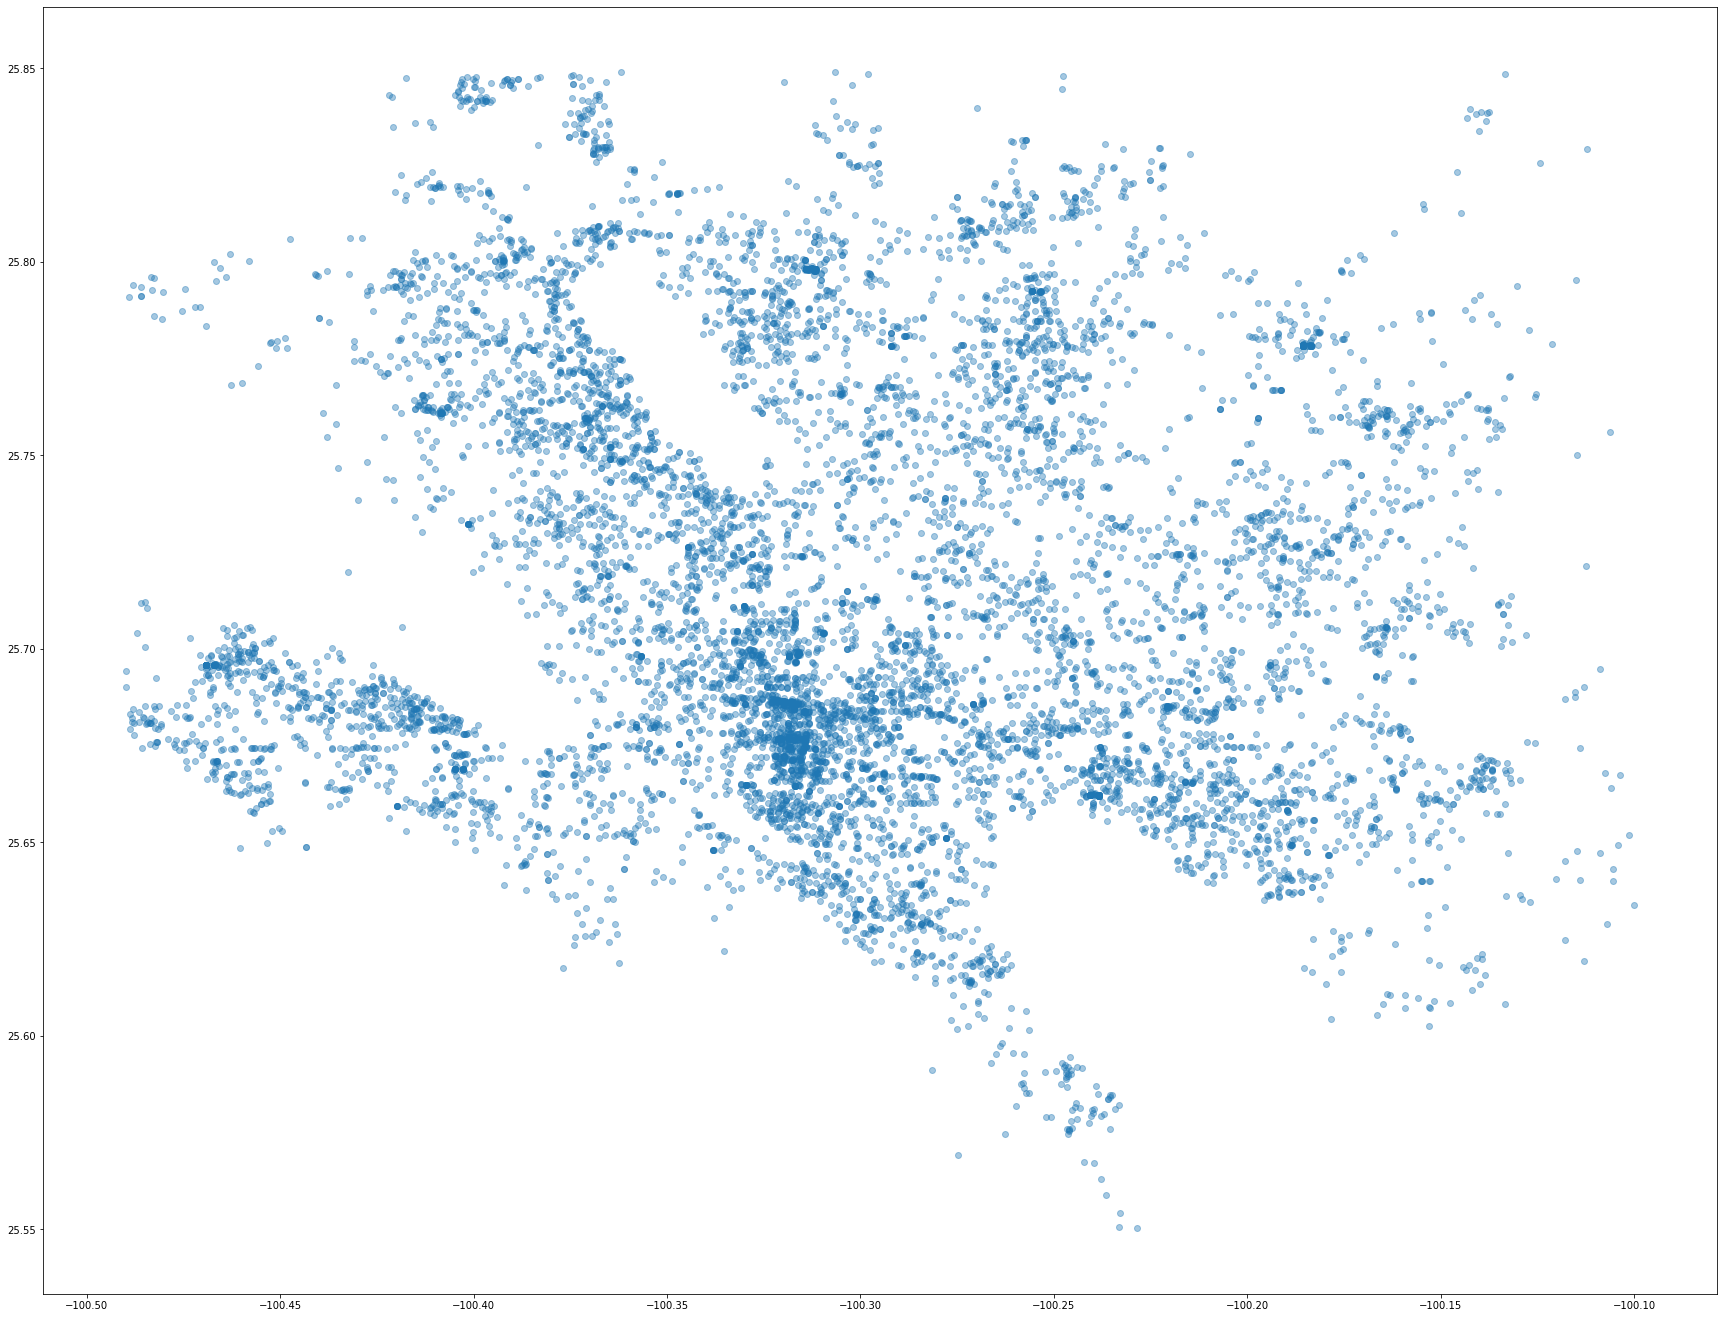

In [153]:
fig,ax = plt.subplots(figsize=(30,30))
geo_points.plot(ax=ax, alpha=0.4)

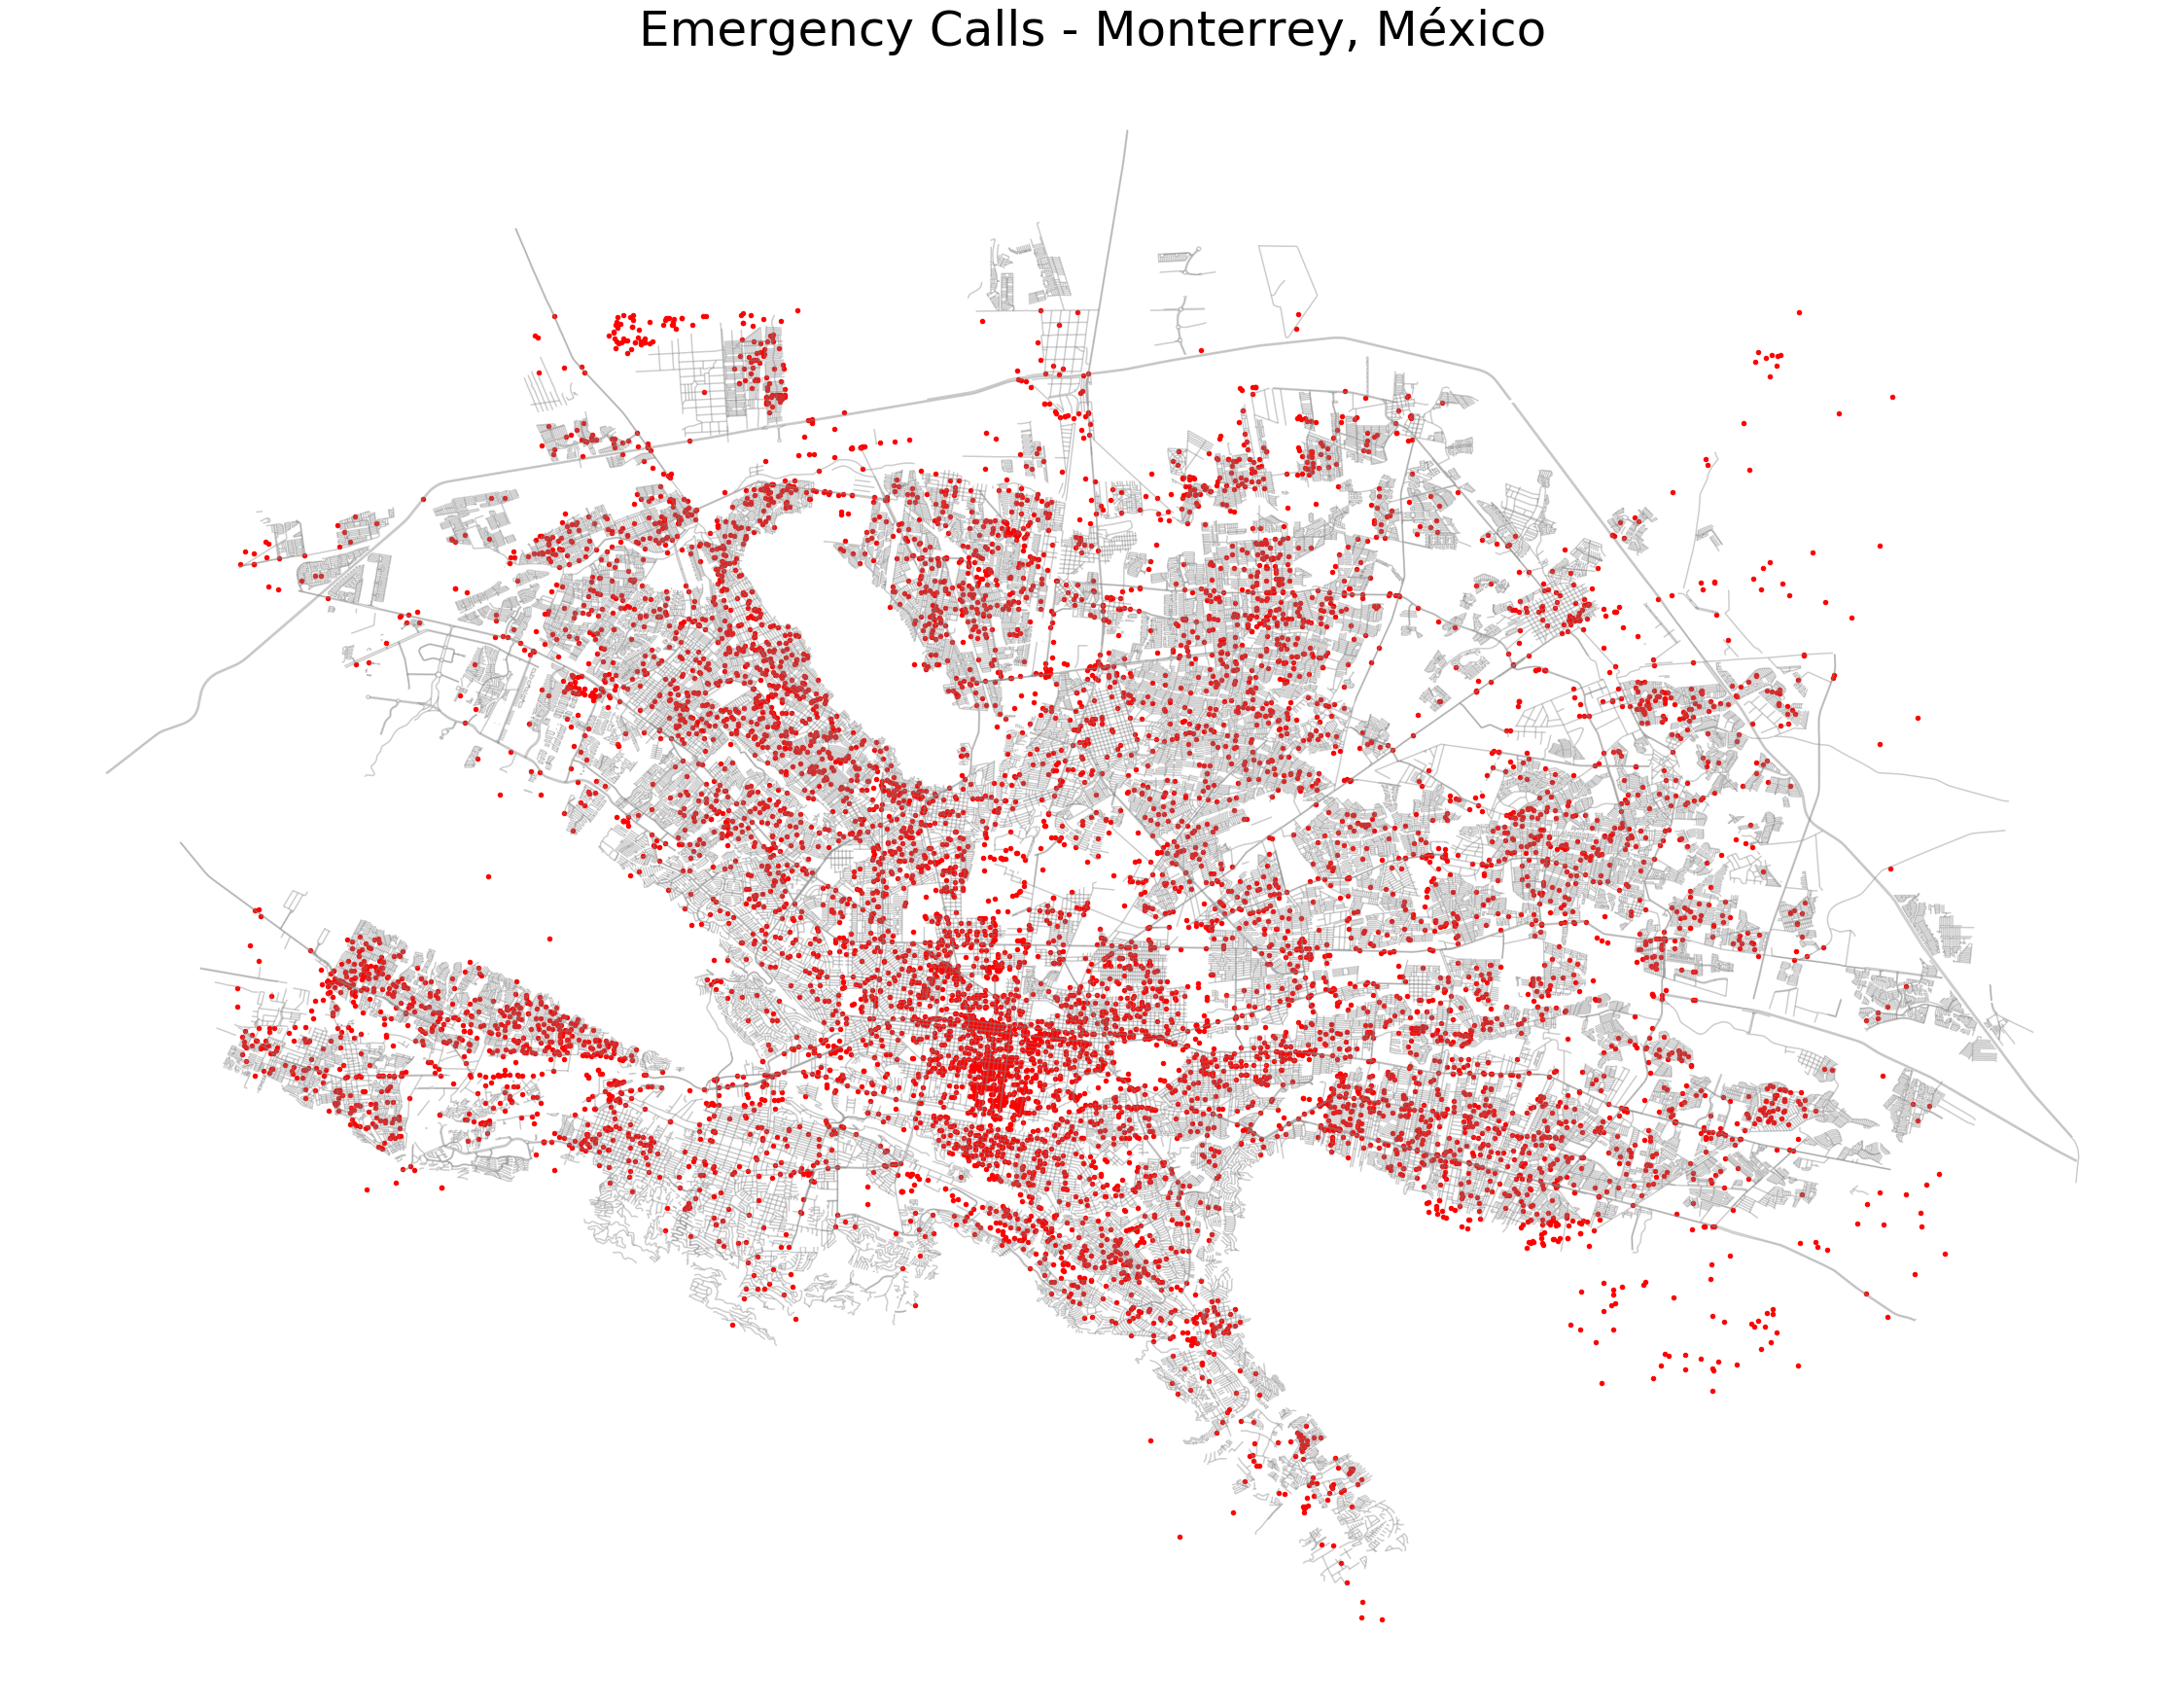

In [157]:
fig,ax = plt.subplots(figsize=(40,40))
main_streets.plot(ax=ax, alpha=0.4, color='grey')
geo_points.plot(ax=ax, color='red', markersize=20)
plt.title("Emergency Calls - Monterrey, México", fontsize=50);
plt.axis('off');